# Entregável 01 - Turing Academy

#### Nome: Mariana Souza Silva

link do enunciado (com dataset): https://docs.google.com/document/d/1SbG_ik_haXcKwjXVuvHvPhej0aHDRE8dY3296Cf7VQU/edit

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
medicoes = pd.read_csv('dataset1.csv')

## Exercício 1.a. - Parsing Data

In [3]:
# retirando os dias da semana, que não têm utilidade, dos valores de 'Data'
def modify_date(date):
    indice = date.index('-')
    date = date[indice + 2:]
    return date

In [4]:
medicoes.data = medicoes.data.apply(modify_date)

In [5]:
medicoes.data = pd.to_datetime(medicoes.data, format = '%d/%m/%Y %H:%M')

In [6]:
medicoes.data

0      2023-04-01 00:00:00
1      2023-04-01 00:15:00
2      2023-04-01 00:30:00
3      2023-04-01 00:45:00
4      2023-04-01 01:00:00
               ...        
2875   2023-04-30 22:45:00
2876   2023-04-30 23:00:00
2877   2023-04-30 23:15:00
2878   2023-04-30 23:30:00
2879   2023-04-30 23:45:00
Name: data, Length: 2880, dtype: datetime64[ns]

## Exercício 1.b. 

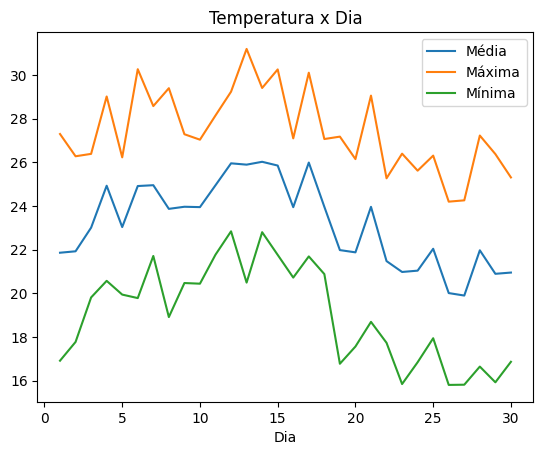

In [7]:
medicoes.groupby(medicoes.data.dt.day).temperatura.mean().plot(title = 'Temperatura x Dia', label = 'Média')
medicoes.groupby(medicoes.data.dt.day).temperatura.max().plot(label = 'Máxima')
medicoes.groupby(medicoes.data.dt.day).temperatura.min().plot(label = 'Mínima', xlabel = 'Dia')
plt.legend()

plt.show()

In [8]:
medicoes.groupby(medicoes.data.dt.day).temperatura.min().mean() # temperatura mínima média

19.055333333333333

In [9]:
medicoes.groupby(medicoes.data.dt.day).temperatura.max().mean() # temperatura máxima média 

27.456999999999997

In [10]:
amplitudes = medicoes.groupby(medicoes.data.dt.day).temperatura.max() - medicoes.groupby(medicoes.data.dt.day).temperatura.min()
amplitudes.mean() # amplitude térmica média

8.401666666666666

Percebe-se que a amplitude térmica diária é praticamente constante durante todo o mês de abril (cerca de 8,5ºC), além de que as temperaturas médias estão na faixa dos 22ºC - com máximas e mínimas de cerca de 28ºC e 19ºC - o que é condizente com as características do outono em São Paulo.

 Além disso, vê-se uma pequena tendência de diminuição das temperaturas com o passar do mês, o que corrobora a aproximação crescente do inverno.

C:\Users\junbi\AppData\Local\Temp\ipykernel_4748\1500111784.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  dia = medicoes.data.dt.date == pd.to_datetime('2023-04-10')


<Axes: xlabel='data'>

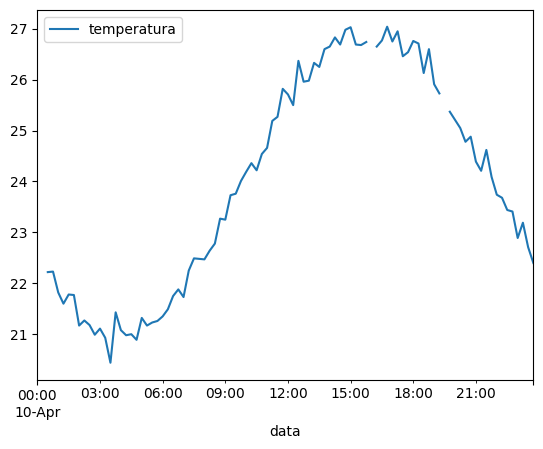

In [11]:
dia = medicoes.data.dt.date == pd.to_datetime('2023-04-10')
medicoes[dia].plot(x='data', y='temperatura')

 Vemos agora a tendência de variação de temperatura no decorrer de um dia: ela atinge seu mínimo e tende a diminuir durante a noite e atinge seu máximo e tende a crescer de dia;

## Exercício 1.c.

 Vimos no último gráfico que o grafico temperatura x dia tem, em geral, formato cônico. Isto é, perto de atingir seus máximos e mínimos, as temperaturas tendem a variar menos;

responsável
Fernando    Axes(0.125,0.11;0.775x0.77)
Fábio       Axes(0.125,0.11;0.775x0.77)
Júlia       Axes(0.125,0.11;0.775x0.77)
Letícia     Axes(0.125,0.11;0.775x0.77)
Marcela     Axes(0.125,0.11;0.775x0.77)
Rafael      Axes(0.125,0.11;0.775x0.77)
dtype: object

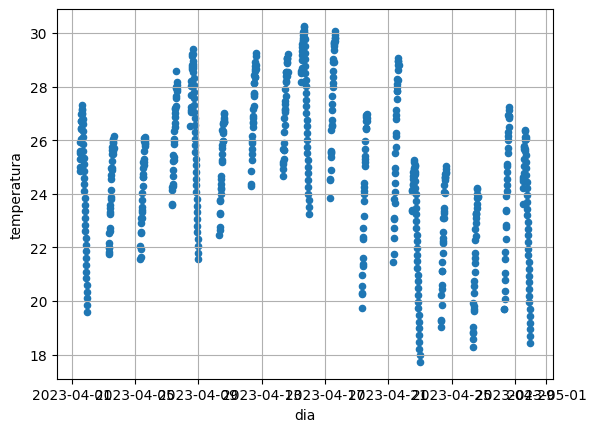

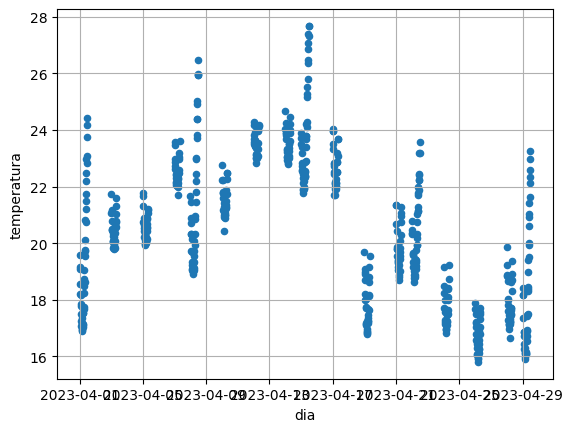

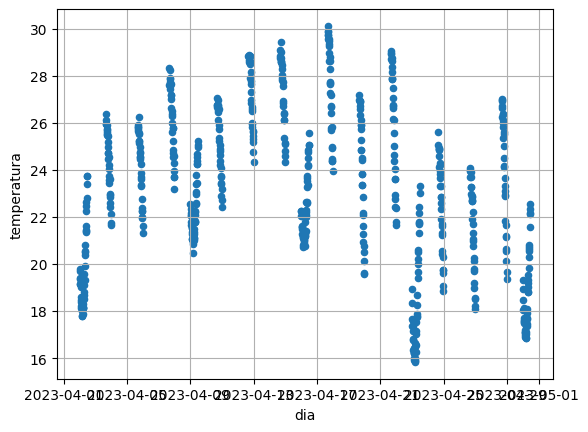

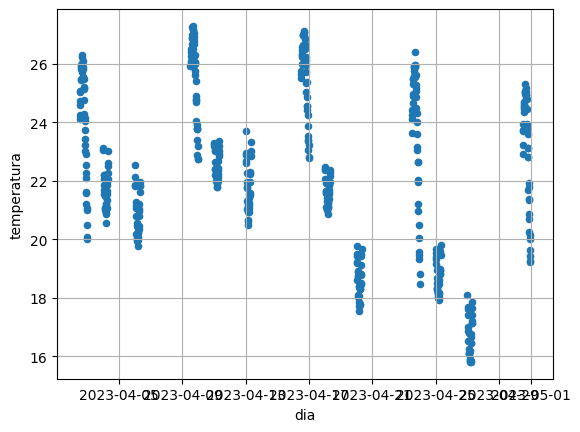

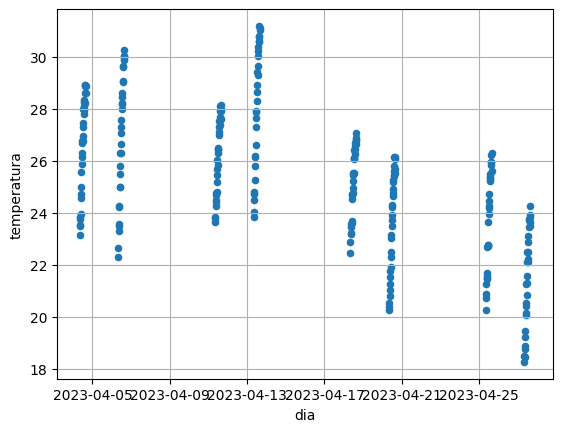

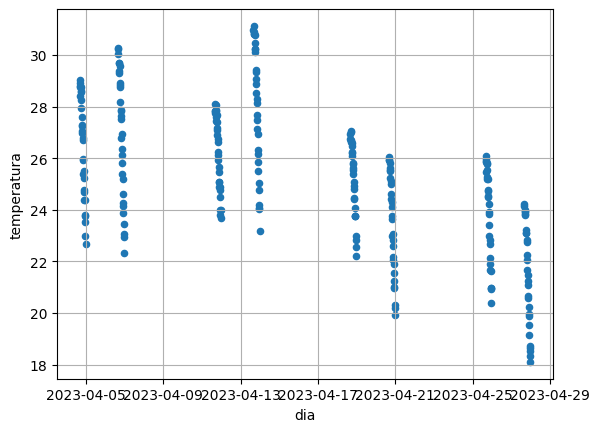

In [12]:
medicoes.groupby('responsável').plot(kind='scatter',x='data', y='temperatura', grid=True, xlabel= 'dia')

Assim, vemos uma discrepância no gráfico de Fernando (1º), que, em suas medições de tarde/noite (períodos de decrescimento), apresenta pontos igualmente espaçados (de mesma variação) em todo o intervalo de decrescimento;

In [13]:
# Comprovando a hipótese:
mask1 = medicoes.data.dt.date == pd.to_datetime('2023-04-08')
mask2 = medicoes.data.dt.date == pd.to_datetime('2023-04-29')
mask3 = medicoes.data.dt.date == pd.to_datetime('2023-04-15')

C:\Users\junbi\AppData\Local\Temp\ipykernel_4748\2735056414.py:2: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  mask1 = medicoes.data.dt.date == pd.to_datetime('2023-04-08')
C:\Users\junbi\AppData\Local\Temp\ipykernel_4748\2735056414.py:3: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  mask2 = medicoes.data.dt.date == pd.to_datetime('2023-04-29')
C:\Users\junbi\AppData\Local\Temp\ipykernel_4748\2735056414.py:4: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Us

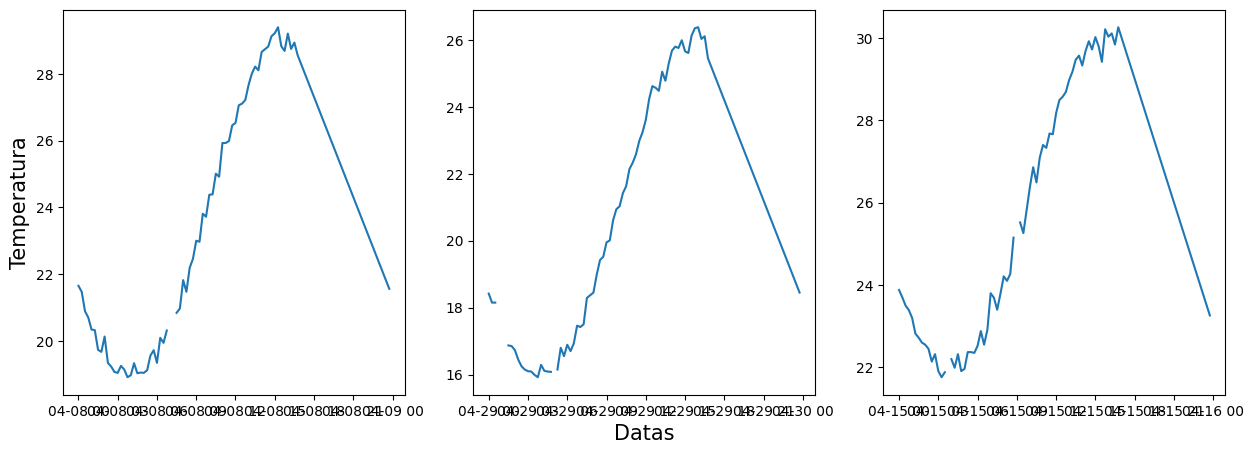

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].plot('data', 'temperatura', data=medicoes[mask1])
axes[1].plot('data', 'temperatura', data=medicoes[mask2])
axes[2].plot('data', 'temperatura', data=medicoes[mask3])
axes[0].set_ylabel('Temperatura', fontsize=15)
axes[1].set_xlabel('Datas', fontsize=15)
plt.show()

De fato, as medições de Fernando se comportam como pontos de uma reta, o que indica que Fernando não mediu de verdade suas temperaturas

## Exercício 1.d.

In [15]:
medicoes.temperatura.isna().mean()*100 #cerca de 3% da coluna é nula

2.8125

<Axes: >

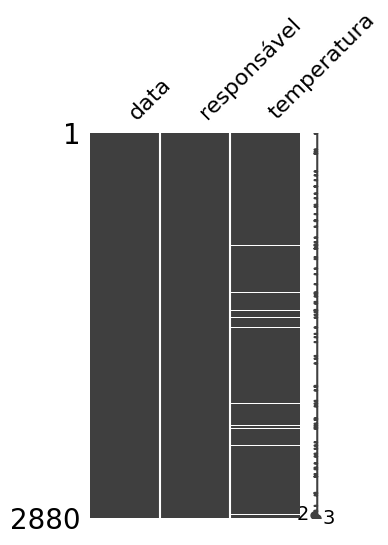

In [16]:
msno.matrix(medicoes, figsize=(3, 5)) #vê-se que os dados não estão concentrados, mas sim espalhados pela coluna.

<Axes: xlabel='data'>

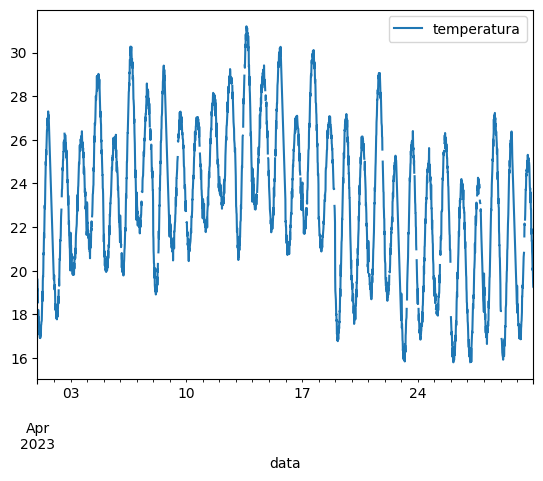

In [17]:
medicoes.plot(x='data', y='temperatura') # vemos diferentes tendências de crescimento e decrescimento pelo gráfico

In [18]:
# assim, iremos usar a interpolação linear, levando em conta as tendências individuais de cada parte do grafico
medicoes.temperatura = medicoes.temperatura.interpolate(method='linear') 

<Axes: xlabel='data'>

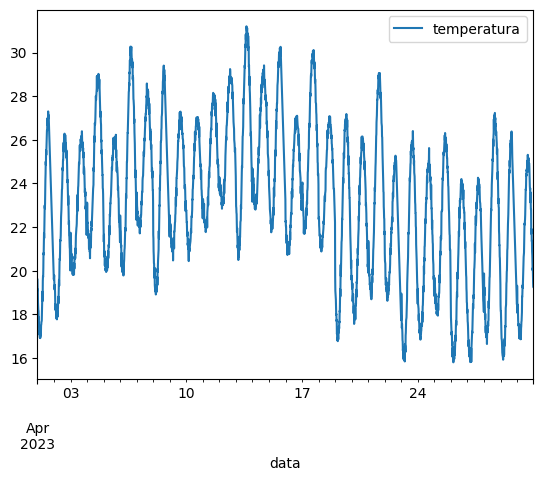

In [19]:
medicoes.plot(x='data', y='temperatura') # vemos diferentes tendências de crescimento e decrescimento pelo gráfico

## Exercício 1.e.

In [20]:
temp_minima = medicoes[medicoes.data.dt.weekday == 2].temperatura.min() #Mon-0, Sun-6
temp_minima

15.8

In [21]:
index_temp_minima = medicoes.index[medicoes.temperatura == temp_minima]

In [22]:
medicoes.iloc[index_temp_minima].data

2414   2023-04-26 03:30:00
Name: data, dtype: datetime64[ns]

 - A quarta-feira mais fria do mês foi a de 26-04, com 15,8ºC de temperatura mínima.

## Exercício 1.f.

In [23]:
aux = medicoes
aux.data = aux.data.dt.day #ajustando coluna data para conter apenas o dia

In [24]:
temp_max_media = aux.groupby('data').temperatura.max().mean()
temp_min_media = aux.groupby('data').temperatura.min().mean()

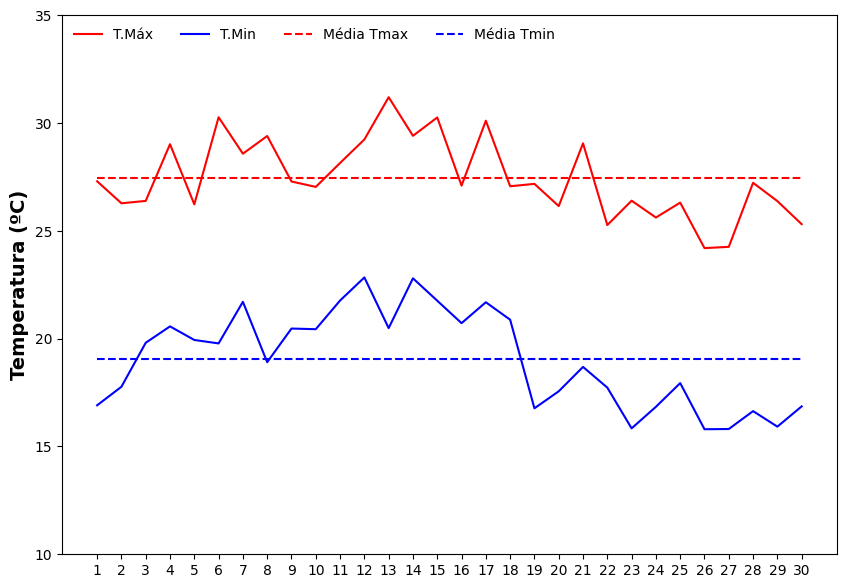

In [25]:
fig, ax = plt.subplots(figsize=(10, 7))
aux.groupby('data').temperatura.max().plot(color='red', label='T.Máx')
aux.groupby('data').temperatura.min().plot(color='blue', label='T.Min', xlabel='')
ax.plot([1, 30], [temp_max_media, temp_max_media], color='red', label='Média Tmax', ls='--')
plt.plot([1, 30], [temp_min_media, temp_min_media], color='blue', label='Média Tmin', ls='--')
plt.ylabel('Temperatura (ºC)', fontsize=14, fontweight='bold')
plt.legend(ncol=4, frameon =False,loc = 'upper left')
ax.set_yticks([10, 15, 20, 25, 30, 35])
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])
plt.show()